# ***Outline***

# ***Data***

## ***Upload Data***

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} numpy

Solving environment: - 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - anaconda/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.



In [2]:
import os

In [3]:
import pandas as pd

In [4]:
DATA_PATH = '/Users/jisha/Unit 240_Build_Week/data/'
states = pd.read_csv(DATA_PATH + 'states_all_extended.csv')
finances = pd.read_csv(DATA_PATH + 'finance_states.csv')

In [5]:
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [6]:
finances.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,1992_ALASKA,ALASKA,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [7]:
states.shape, finances.shape

((1492, 193), (1326, 13))

## ***Update Data***

### ***Merging Tail***

* merging the tail of both dataframes before concating

In [8]:
state_tail = pd.DataFrame(states.tail(51))
finance_tail = pd.DataFrame(finances.tail(51)) #I just need the last 51 rows

In [9]:
state_tail.shape, finance_tail.shape

((51, 193), (51, 13))

In [10]:
columns = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE',
           'STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
           'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']
state_tail = state_tail.drop(columns=columns) #Dropping unnecessary columns from state_tail, so I do not have to do this later

In [11]:
merge = pd.merge(finance_tail, state_tail, on=['PRIMARY_KEY','STATE', 'YEAR'])

In [12]:
merge.shape

(51, 193)

In [13]:
merge.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2017_ALABAMA,ALABAMA,2017,744930.0,7911674,811407,4350594,2749673,8031412,4046379,...,NaN,NaN,NaN,NaN,NaN,NaN,232.170688,268.312020,216.419814,257.686520
1,2017_ALASKA,ALASKA,2017,132737.0,2504501,350204,1600503,553794,2587060,1266077,...,NaN,NaN,NaN,NaN,NaN,NaN,230.456278,277.015572,207.037630,257.667497
2,2017_ARIZONA,ARIZONA,2017,936147.0,8677631,1178196,3446191,4053244,8389808,4081153,...,NaN,NaN,NaN,NaN,NaN,NaN,234.435788,282.248145,215.465952,262.957457
3,2017_ARKANSAS,ARKANSAS,2017,478996.0,5481422,597260,4137903,746259,5479899,2691959,...,NaN,NaN,NaN,NaN,NaN,NaN,233.848144,273.759907,216.108026,259.955798
4,2017_CALIFORNIA,CALIFORNIA,2017,6195344.0,91803968,7889546,51046506,32867916,90161939,44748095,...,NaN,NaN,NaN,NaN,NaN,NaN,232.262941,276.638200,215.421814,262.520630


### ***Concatenating Data***

In [14]:
head = states.head(1441)

In [15]:
df = head.append(merge)

# ***Data Exploration***

In [16]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [17]:
df.tail() #Checking that it merged correctly

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
46,2017_VIRGINIA,VIRGINIA,2017,1286711.0,16822120.0,1131679.0,6565670.0,9124771.0,17271169.0,9313733.0,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
47,2017_WASHINGTON,WASHINGTON,2017,1098187.0,15764749.0,1068053.0,9822674.0,4874022.0,16126035.0,7613934.0,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
48,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,273170.0,3490687.0,403856.0,1872045.0,1214786.0,3416235.0,1812983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
49,2017_WISCONSIN,WISCONSIN,2017,855924.0,12104649.0,802599.0,6197033.0,5105017.0,12026422.0,6043577.0,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304
50,2017_WYOMING,WYOMING,2017,93925.0,1932978.0,117807.0,1141557.0,673614.0,1927490.0,918465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,247.820619,288.761812,226.831211,269.371456


In [18]:
#How many observations are available
df.shape

(1492, 193)

In [19]:
#Are there any columns with null values?
df.isna().sum()

PRIMARY_KEY               0
STATE                     0
YEAR                      0
ENROLL                  212
TOTAL_REVENUE           161
                       ... 
GRADES_ALL_TRF         1166
AVG_MATH_4_SCORE        956
AVG_MATH_8_SCORE        960
AVG_READING_4_SCORE     959
AVG_READING_8_SCORE     994
Length: 193, dtype: int64

In [20]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.280000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.280000e+03,...,343.000000,343.000000,343.000000,343.000000,343.000000,326.000000,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.174300e+05,9.274162e+06,7.785491e+05,4.300729e+06,4.194885e+06,9.375933e+06,4.858815e+06,2.734451e+06,4.363877e+05,...,1028.244898,858.005831,688.883382,8177.699708,3181.918367,10159.435583,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.068204e+06,1.205160e+07,1.157786e+06,5.685300e+06,5.641828e+06,1.227319e+07,6.458443e+06,3.439435e+06,5.448701e+05,...,1342.500562,1137.723466,1010.942102,10627.763472,4529.779883,10692.452016,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.617798e+05,2.210191e+06,1.911455e+05,1.174059e+06,7.358395e+05,2.188797e+06,1.179241e+06,6.460350e+05,1.054122e+05,...,169.500000,122.000000,76.000000,1364.000000,398.000000,1884.250000,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.521425e+05,5.171631e+06,4.160630e+05,2.570987e+06,2.089445e+06,5.298267e+06,2.701637e+06,1.545738e+06,2.764680e+05,...,557.000000,442.000000,350.000000,4726.000000,1572.000000,6454.500000,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014540e+06,1.111990e+07,8.462290e+05,5.185174e+06,4.843230e+06,1.087317e+07,5.641158e+06,3.317215e+06,5.267228e+05,...,1353.000000,1076.500000,857.000000,10444.000000,3987.000000,13967.000000,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,9.180397e+07,9.990221e+06,5.104651e+07,3.800098e+07,9.016194e+07,4.514133e+07,2.757241e+07,4.211532e+06,...,9149.000000,7131.000000,6890.000000,71139.000000,28985.000000,49175.000000,253.420961,300.568235,236.773867,280.499130


All columns, except State and Primary Key, are numeric. This means that other than data cleaning, I can try all the columns since these are not high cardinality categorical columns.

# ***Choose your evaluation metric(s)***

In [21]:
target_df = df[['PRIMARY_KEY','STATE','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE' ]].copy()
target_df.head()

,PRIMARY_KEY,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,208.398961,260.892247,196.764414,NaN


Using 8th grade reading. Creating a classification class by grouping the scores into different categories. I think this will give more information then the numeric values.

Noticings: Unfortunately, the state scores are not very good for any of the states for any of the years. Most states, across both Math and Reading, have underperformed; only a small percentage scored proficient.

## 8th Grade Reading

### ***Data Cleaning***

In [22]:
#This code finds the mean by states and then fills in NaN values with that mean
target_df['AVG_READING_8_SCORE'] = target_df.groupby('STATE')['AVG_READING_8_SCORE'].transform(lambda x: x.fillna(x.mean()))

In [23]:
target_df['AVG_READING_8_SCORE'].isnull().sum()

161

In [24]:
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].fillna(0)
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].astype(int)
target_df['AVG_READING_8_SCORE']

0     264
1     258
2     262
3     264
4     261
     ... 
46    273
47    267
48    271
49    258
50    269
Name: AVG_READING_8_SCORE, Length: 1492, dtype: int64

In [25]:
target_df['AVG_READING_8_SCORE'].value_counts()

264    218
263    191
265    163
0      161
262    134
261    117
266    105
260     70
267     47
259     35
268     34
269     32
270     21
257     19
258     18
272     14
251     13
255     12
253     11
254     10
273      9
271      9
256      8
274      7
252      7
250      6
277      3
275      3
276      2
247      2
238      2
242      2
239      1
236      1
249      1
240      1
246      1
248      1
280      1
Name: AVG_READING_8_SCORE, dtype: int64

In [26]:
min(target_df['AVG_READING_8_SCORE']), max(target_df['AVG_READING_8_SCORE'])

(0, 280)

NAEP Reading Score Breakdown
- basic (0-280)
> This column was broken down into 3 categories: 
> - low, 
> - mid, and 
> - high basic
- proficient (281-322)
- advanced (323-500)

In [27]:
def proficiency(row):
  #separating basic into 3 groups (0-281)
    if 0< row['AVG_READING_8_SCORE'] < 240:
        val = '1'
    elif 240 <= row['AVG_READING_8_SCORE'] < 265:
        val = '2'
    elif 265 <= row['AVG_READING_8_SCORE'] < 281:
        val = '3'
    elif 281 <= row['AVG_READING_8_SCORE'] < 323:
        val = '4'
    elif row['AVG_READING_8_SCORE'] >= 323:
        val = '5'
    else:
        val = 0
    return val

target_df['READING_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['READING_PROF_8'].astype('int')

0     2
1     2
2     2
3     2
4     2
     ..
46    3
47    3
48    3
49    2
50    3
Name: READING_PROF_8, Length: 1492, dtype: int64

In [28]:
target_df['READING_PROF_8'].value_counts(normalize=True)

2    0.587802
3    0.301609
0    0.107909
1    0.002681
Name: READING_PROF_8, dtype: float64

## 8th Grade Math

### ***Data Cleaning***

In [29]:
#This code finds the mean by states and then fills in NaN values with that mean
target_df['AVG_MATH_8_SCORE'] = target_df.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))

In [30]:
target_df['AVG_MATH_8_SCORE'].isnull().sum()

161

In [31]:
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].fillna(0)
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].astype(int)
target_df['AVG_MATH_8_SCORE']

0     252
1     280
2     265
3     256
4     260
     ... 
46    290
47    289
48    273
49    288
50    288
Name: AVG_MATH_8_SCORE, Length: 1492, dtype: int64

In [32]:
target_df['AVG_MATH_8_SCORE'].value_counts()

0      161
283    115
282    101
280     72
287     68
273     60
277     57
288     55
285     54
284     54
279     49
275     47
286     47
274     46
278     46
270     45
281     44
269     40
271     28
289     27
272     25
262     25
290     24
266     24
265     23
291     23
263     21
250     18
276     13
268     11
267      7
292      6
294      6
259      5
260      5
264      4
261      4
293      4
258      3
256      2
234      2
252      2
297      2
253      2
295      2
298      2
296      2
254      1
257      1
249      1
248      1
246      1
245      1
243      1
232      1
300      1
Name: AVG_MATH_8_SCORE, dtype: int64

In [33]:
min(target_df['AVG_MATH_8_SCORE']), max(target_df['AVG_MATH_8_SCORE'])

(0, 300)

NAEP Math Score Breakdown
- basic (0-298)
> This column was broken down into 3 categories:
> -  low, 
> - mid, and 
> - high basic
- proficient (298-332)
- advanced (333-500)

In [34]:
def proficiency(row):
    if 0 < row['AVG_MATH_8_SCORE'] < 270:
        val = '1'
    elif 270 <= row['AVG_MATH_8_SCORE'] < 280:
        val = '2 '
    elif 280 <= row['AVG_MATH_8_SCORE'] < 299:
        val = '3'    
    elif 299 <= row['AVG_MATH_8_SCORE'] < 333:
        val = '4'
    elif row['AVG_MATH_8_SCORE'] >= 333:
        val = '5'
    else:
        val = 0
    return val

target_df['MATH_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['MATH_PROF_8'].astype('int')

0     1
1     3
2     1
3     1
4     1
     ..
46    3
47    3
48    2
49    3
50    3
Name: MATH_PROF_8, Length: 1492, dtype: int64

In [35]:
target_df['MATH_PROF_8'].value_counts(normalize=True)

3     0.474531
2     0.278820
1     0.138070
0     0.107909
4     0.000670
Name: MATH_PROF_8, dtype: float64

# ***Target***

Adding the two new engineered features back into the dataframe

In [36]:
df = df.drop(columns = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE'])

In [37]:
df[['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE','READING_PROF_8', 'MATH_PROF_8']] = target_df[['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE','READING_PROF_8','MATH_PROF_8' ]].copy()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_8_SCORE,READING_PROF_8,MATH_PROF_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,208.327876,207.963517,264,252,2,1
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,258,280,2,3
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,215.253932,206.212716,262,265,2,1
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,210.206028,208.634458,264,256,2,1
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,208.398961,196.764414,261,260,2,1


In [38]:
df['READING_PROF_8'] = df['READING_PROF_8'].astype(int)
df['MATH_PROF_8'] = df['MATH_PROF_8'].astype(int)

In [39]:
df.dtypes

PRIMARY_KEY             object
STATE                   object
YEAR                     int64
ENROLL                 float64
TOTAL_REVENUE          float64
                        ...   
AVG_READING_4_SCORE    float64
AVG_READING_8_SCORE      int64
AVG_MATH_8_SCORE         int64
READING_PROF_8           int64
MATH_PROF_8              int64
Length: 195, dtype: object

# ***Train/Val/Test***

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train = df[df['YEAR'] < 2013]
test = df[df['YEAR'] >= 2013]
train.shape, test.shape

((1219, 195), (273, 195))

In [42]:
min(train['YEAR']), max(train['YEAR'])

(1992, 2012)

In [43]:
min(test['YEAR']), max(test['YEAR'])

(2013, 2017)

In [44]:
train, val = train_test_split(
    train, train_size=0.60, test_size=0.40,
    stratify=train['READING_PROF_8'], 
    random_state=42
)

train.shape, val.shape, test.shape

((731, 195), (488, 195), (273, 195))

# ***Testing for Data Leakage***

In [45]:
!pip install category_encoders

In [46]:
%matplotlib inline
import category_encoders as ce

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [47]:
train = train.fillna('Missing')
val = val.fillna('Missing')
test = test.fillna('Missing')

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Arrange data into X features matrix and y target vector
target = 'READING_PROF_8'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline_dt = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline_dt.fit(X_train, y_train)
print('Validation Accuracy', pipeline_dt.score(X_val, y_val))

Validation Accuracy 1.0


In [49]:
!pip install graphviz

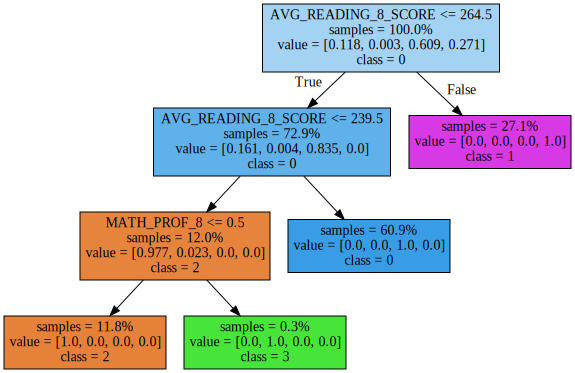

In [50]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline_dt.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False, 
    proportion=True)

graphviz.Source(dot_data)

# ***Rerunning***

In [51]:
df = head.append(merge)

In [52]:
df = df.drop(columns = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE'])

In [53]:
df[['AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE','MATH_PROF_8','READING_PROF_8']] = target_df[['AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE','MATH_PROF_8','READING_PROF_8']].copy()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE,MATH_PROF_8,READING_PROF_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,208.327876,207.963517,252,264,1,2
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,280,258,3,2
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,215.253932,206.212716,265,262,1,2
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,210.206028,208.634458,256,264,1,2
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,208.398961,196.764414,260,261,1,2


In [54]:
df['READING_PROF_8'] = df['READING_PROF_8'].astype(int)
df['MATH_PROF_8'] = df['MATH_PROF_8'].astype(int)

In [55]:
train = df[df['YEAR'] <= 2013]
test = df[df['YEAR'] > 2013]
train.shape, test.shape

((1277, 195), (215, 195))

In [56]:
train, val = train_test_split(
    train, train_size=0.60, test_size=0.40,
    stratify=train['READING_PROF_8'], 
    random_state=42
)

train.shape, val.shape, test.shape

((766, 195), (511, 195), (215, 195))

### ***Cleaning Data***

TO DO:
- There are several columns that do not have any data. 

**DROP**
- primary key (this is just a combination of state and year
- Since this model is trying to predict scores for each state, I will be dropping the years that do not have any recorded scores. 
- This data contains information for all 50 states, including Washington D.C, as well as US territories. Unfortunately, there is not information about expenditure for those columns, so that information will be dropped as well. 
- I will create a new dataframe which has the breakdown of demographics and then delete those columns from this dataframe. The demographics info was not captured until 2009, that will be too many np.nan values to use to build a useful model. 



In [57]:
train.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'GRADES_12_TRF', 'GRADES_1_8_TRF', 'GRADES_9_12_TRF', 'GRADES_ALL_TRF',
       'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_8_SCORE', 'MATH_PROF_8', 'READING_PROF_8'],
      dtype='object', length=195)

### ***Feature Engineering***

- For this dataset, I would delete the years where the NAEP test scores are not available since that does not give anything for me to train/validate/test the data on. The data is from 1992 - 2017. The NAEP only gives information for the years 1992, 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017. ✓
- I will also delete the years where I do not have the finacial information available ✓
- 2017 (I am going to try and run the code on kaggle to extract the 2017 financial information from the US Census site) ✓


In [58]:
train.groupby('STATE').mean()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE,MATH_PROF_8,READING_PROF_8
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2002.900000,733965.900000,5.500469e+06,568936.200000,3.194067e+06,1.737466e+06,5.624908e+06,2.914756e+06,1.620027e+06,451126.900000,...,NaN,NaN,NaN,NaN,225.645299,210.408278,263.000000,264.700000,1.000000,2.200000
ALASKA,2004.333333,130848.733333,1.691878e+06,265068.933333,1.021510e+06,4.052985e+05,1.819245e+06,8.951511e+05,6.266891e+05,58791.533333,...,263.20,3073.800000,1166.2,4334.200000,234.186236,210.913963,280.200000,263.800000,2.800000,2.333333
AMERICAN_SAMOA,2002.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
ARIZONA,2003.176471,875459.062500,6.549546e+06,783975.470588,2.760691e+06,3.004879e+06,6.605608e+06,3.032112e+06,2.051728e+06,323763.562500,...,480.75,5919.250000,2277.0,8251.250000,227.348464,208.783949,274.176471,263.176471,1.882353,2.176471
ARKANSAS,2002.000000,437997.083333,3.259555e+06,371155.769231,2.305379e+06,5.830208e+05,3.387348e+06,1.724709e+06,1.005450e+06,254008.833333,...,188.00,2359.000000,879.5,3341.750000,226.369523,213.676209,268.692308,264.538462,1.769231,2.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRGIN_ISLANDS,2003.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.00,33.000000,44.5,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
WASHINGTON,2001.866667,995417.000000,8.413861e+06,657610.466667,5.289223e+06,2.467028e+06,8.648341e+06,4.227706e+06,2.509973e+06,377268.466667,...,1753.00,17804.000000,7526.5,25543.500000,240.417536,222.917322,284.666667,264.933333,3.000000,2.933333
WEST_VIRGINIA,2002.666667,293047.888889,2.608390e+06,262479.777778,1.534276e+06,8.116347e+05,2.557555e+06,1.413668e+06,7.827014e+05,167582.555556,...,55.50,1566.500000,278.0,2077.000000,229.120583,216.162878,269.111111,265.888889,1.222222,2.888889


### ***Wrangle***

In [59]:
import numpy as np

In [60]:
def wrangle(X):
  # Prevent SettingWithCopyWarning
  X = X.copy()

  X = X.replace (0, np.NaN)

  # When columns have zeros and shouldn't, they are like null values.
  # So we will replace the zeros with nulls, and impute missing values later.
  cols_with_zeros = ['AVG_MATH_8_SCORE','AVG_READING_8_SCORE']
  for col in cols_with_zeros:
     X[col] = X[col].replace(0, np.nan)

  #Dropping rows if they do not contain any score data, will not drop if there is just 1 value
  X = X.dropna(axis=0, subset=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], how = 'any')

  #Dropping rows that do not contain any financial information
  X = X.dropna(axis=0, subset = ['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE'], how = 'all')

  #Dropping columns
  #Primary Key is just State and Year
  #Dropping breakdown of demographics into male/female because this does not start to get recorded until 2009
  drop = ['PRIMARY_KEY',
          'GRADES_PK_HP','GRADES_KG_HP','GRADES_4_HP','GRADES_8_HP','GRADES_12_HP', 'GRADES_1_8_HP', 'GRADES_9_12_HP', 'GRADES_ALL_HP',
          'GRADES_PK_TR','GRADES_KG_TR','GRADES_4_TR','GRADES_8_TR','GRADES_12_TR', 'GRADES_1_8_TR', 'GRADES_9_12_TR', 'GRADES_ALL_TR',
          'GRADES_PK_AMM','GRADES_KG_AMM','GRADES_4_AMM','GRADES_8_AMM','GRADES_12_AMM', 'GRADES_1_8_AMM', 'GRADES_9_12_AMM', 'GRADES_ALL_AMM',
          'GRADES_PK_AMF','GRADES_KG_AMF','GRADES_4_AMF','GRADES_8_AMF','GRADES_12_AMF', 'GRADES_1_8_AMF', 'GRADES_9_12_AMF', 'GRADES_ALL_AMF',
          'GRADES_PK_ASM','GRADES_KG_ASM','GRADES_4_ASM','GRADES_8_ASM','GRADES_12_ASM', 'GRADES_1_8_ASM', 'GRADES_9_12_ASM', 'GRADES_ALL_ASM',
          'GRADES_PK_ASF','GRADES_KG_ASF','GRADES_4_ASF','GRADES_8_ASF','GRADES_12_ASF', 'GRADES_1_8_ASF', 'GRADES_9_12_ASF', 'GRADES_ALL_ASF',
          'GRADES_PK_HIM','GRADES_KG_HIM','GRADES_4_HIM','GRADES_8_HIM','GRADES_12_HIM', 'GRADES_1_8_HIM', 'GRADES_9_12_HIM', 'GRADES_ALL_HIM',
          'GRADES_PK_HIF','GRADES_KG_HIF','GRADES_4_HIF','GRADES_8_HIF','GRADES_12_HIF', 'GRADES_1_8_HIF', 'GRADES_9_12_HIF', 'GRADES_ALL_HIF',
          'GRADES_PK_BLM','GRADES_KG_BLM','GRADES_4_BLM','GRADES_8_BLM','GRADES_12_BLM', 'GRADES_1_8_BLM', 'GRADES_9_12_BLM', 'GRADES_ALL_BLM',
          'GRADES_PK_BLF','GRADES_KG_BLF','GRADES_4_BLF','GRADES_8_BLF','GRADES_12_BLF', 'GRADES_1_8_BLF', 'GRADES_9_12_BLF', 'GRADES_ALL_BLF',
          'GRADES_PK_WHM','GRADES_KG_WHM','GRADES_4_WHM','GRADES_8_WHM','GRADES_12_WHM', 'GRADES_1_8_WHM', 'GRADES_9_12_WHM', 'GRADES_ALL_WHM',
          'GRADES_PK_WHF','GRADES_KG_WHF','GRADES_4_WHF','GRADES_8_WHF','GRADES_12_WHF', 'GRADES_1_8_WHF', 'GRADES_9_12_WHF', 'GRADES_ALL_WHF',
          'GRADES_PK_HPM','GRADES_KG_HPM','GRADES_4_HPM','GRADES_8_HPM','GRADES_12_HPM', 'GRADES_1_8_HPM', 'GRADES_9_12_HPM', 'GRADES_ALL_HPM',
          'GRADES_PK_HPF','GRADES_KG_HPF','GRADES_4_HPF','GRADES_8_HPF','GRADES_12_HPF', 'GRADES_1_8_HPF', 'GRADES_9_12_HPF', 'GRADES_ALL_HPF',
          'GRADES_PK_TRM','GRADES_KG_TRM','GRADES_4_TRM','GRADES_8_TRM','GRADES_12_TRM', 'GRADES_1_8_TRM', 'GRADES_9_12_TRM', 'GRADES_ALL_TRM',
          'GRADES_PK_TRF','GRADES_KG_TRF','GRADES_4_TRF','GRADES_8_TRF','GRADES_12_TRF', 'GRADES_1_8_TRF', 'GRADES_9_12_TRF', 'GRADES_ALL_TRF']
  X = X.drop(columns=drop)

  #Filling missing scores with state average
  X['AVG_READING_8_SCORE'] = X.groupby('STATE')['AVG_READING_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
  X['AVG_MATH_8_SCORE'] = X.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
  X['AVG_READING_4_SCORE'] = X.groupby('STATE')['AVG_READING_4_SCORE'].transform(lambda x: x.fillna(x.mean()))
  X['AVG_MATH_4_SCORE'] = X.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.mean()))


  #Return the wrangled dataframe
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test) 

train.shape, val.shape, test.shape

((251, 66), (171, 66), (102, 66))

In [61]:
train.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_12_WH,GRADES_1_8_WH,GRADES_9_12_WH,GRADES_ALL_WH,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE,MATH_PROF_8,READING_PROF_8
920,WISCONSIN,2009,867035.0,10991081.0,1258519.0,4785070.0,4947492.0,10880480.0,5857285.0,3382519.0,...,57637.0,365631.0,218756.0,617744.0,243.585254,220.135541,288.0,265.0,3.0,3.0
591,NEW_JERSEY,2003,1350330.0,19785039.0,797717.0,8135014.0,10852308.0,19812932.0,10169992.0,6429003.0,...,54330.0,473609.0,233872.0,715841.0,238.776541,225.073328,281.0,264.0,3.0,2.0
1013,RHODE_ISLAND,2011,139157.0,2212352.0,234111.0,768713.0,1209528.0,2198940.0,1260021.0,736651.0,...,7364.0,54103.0,29862.0,85358.0,241.624775,222.481597,282.0,268.0,3.0,3.0
596,OHIO,2003,1803966.0,18018740.0,1097349.0,7844992.0,9076399.0,18760200.0,8958790.0,6097596.0,...,107252.0,858162.0,456126.0,1334122.0,237.782068,221.865799,281.0,266.0,3.0,3.0
1104,NEVADA,2013,431776.0,4131800.0,392009.0,2556472.0,1183319.0,4057443.0,2058538.0,1396907.0,...,12032.0,98151.0,50083.0,150197.0,236.262899,213.755314,278.0,267.0,2.0,3.0


In [62]:
train.STATE.nunique(), val.STATE.nunique(), test.STATE.nunique()

(51, 50, 51)

### ***Baseline***

In [63]:
train['READING_PROF_8'].value_counts(normalize=True)

2.0    0.505976
3.0    0.486056
1.0    0.007968
Name: READING_PROF_8, dtype: float64

My baseline is ~50% for my majority class 2

### ***Make Exploratory Visuals***

In [64]:
!pip install plotly

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [66]:
train.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_WH,GRADES_1_8_WH,GRADES_9_12_WH,GRADES_ALL_WH,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE,MATH_PROF_8,READING_PROF_8
count,251.000000,2.280000e+02,2.510000e+02,2.510000e+02,2.450000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.280000e+02,...,245.000000,2.450000e+02,245.000000,2.310000e+02,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,2004.278884,9.221469e+05,9.386301e+06,8.077217e+05,4.352509e+06,4.330114e+06,9.522091e+06,4.945843e+06,2.763456e+06,4.458198e+05,...,37966.697959,3.200798e+05,163572.861224,4.634897e+05,233.307769,218.185730,277.031873,262.968127,2.286853,2.478088
std,6.267528,1.104017e+06,1.203176e+07,1.196145e+06,5.647266e+06,5.652042e+06,1.233748e+07,6.476887e+06,3.414763e+06,5.493276e+05,...,33521.318804,2.743460e+05,143444.833196,3.817156e+05,10.906790,8.163315,10.835450,6.612033,0.808323,0.516254
min,1992.000000,4.419900e+04,5.594810e+05,3.102000e+04,8.629600e+04,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.191000e+04,...,92.000000,1.760000e+03,413.000000,2.545000e+03,192.600553,178.557612,234.000000,236.000000,1.000000,1.000000
25%,2000.000000,2.516430e+05,2.242356e+06,1.953515e+05,1.237083e+06,7.639960e+05,2.263915e+06,1.254314e+06,6.894520e+05,1.107065e+05,...,12980.000000,1.180300e+05,58638.000000,1.701905e+05,226.864197,213.518322,270.500000,259.500000,2.000000,2.000000
50%,2005.000000,6.256170e+05,5.067546e+06,4.160630e+05,2.578149e+06,2.052565e+06,5.226339e+06,2.628891e+06,1.480218e+06,2.820825e+05,...,28375.000000,2.402090e+05,120551.000000,3.647780e+05,236.254108,219.763258,280.000000,264.000000,3.000000,2.000000
75%,2009.000000,9.788888e+05,1.065943e+07,8.359320e+05,5.175386e+06,5.057123e+06,1.071454e+07,5.599878e+06,3.114642e+06,5.277425e+05,...,49981.000000,4.287820e+05,218114.000000,6.535645e+05,241.157611,223.814584,284.000000,267.500000,3.000000,3.000000
max,2013.000000,6.307022e+06,7.395890e+07,9.745250e+06,4.008424e+07,3.265556e+07,7.476609e+07,3.875666e+07,2.169368e+07,3.759373e+06,...,157545.000000,1.380806e+06,680228.000000,1.626395e+06,253.396456,236.773867,300.000000,277.000000,4.000000,3.000000


In [67]:
train.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_WH,GRADES_1_8_WH,GRADES_9_12_WH,GRADES_ALL_WH,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE,MATH_PROF_8,READING_PROF_8
YEAR,1.000000,0.000634,0.213994,0.251733,0.175314,0.229587,0.208675,0.206968,0.228532,0.121966,...,0.032396,-0.066144,-0.006697,-0.018947,0.735270,0.339061,0.549407,0.123089,0.517881,0.238017
ENROLL,0.000634,1.000000,0.919364,0.911038,0.931430,0.836140,0.920578,0.883646,0.921539,0.969081,...,0.895432,0.905204,0.904269,0.910957,-0.033349,-0.106161,-0.052921,0.012533,-0.095177,-0.021337
TOTAL_REVENUE,0.213994,0.919364,1.000000,0.920090,0.973422,0.966044,0.998996,0.990843,0.994691,0.942220,...,0.876618,0.827970,0.861098,0.828875,0.185314,0.081480,0.133431,0.039718,0.100413,0.033257
FEDERAL_REVENUE,0.251733,0.911038,0.920090,1.000000,0.915955,0.835982,0.921345,0.879788,0.923228,0.944930,...,0.772030,0.724381,0.757923,0.727437,0.136791,-0.035689,0.072148,0.019105,0.033680,0.030635
STATE_REVENUE,0.175314,0.931430,0.973422,0.915955,1.000000,0.883665,0.972585,0.958345,0.966235,0.949800,...,0.854436,0.808282,0.842787,0.825088,0.095604,-0.044867,0.022419,0.011051,0.003684,0.001533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVG_READING_4_SCORE,0.339061,-0.106161,0.081480,-0.035689,-0.044867,0.161755,0.076609,0.099190,0.082653,-0.058973,...,0.099912,0.040045,0.072494,0.190115,0.807771,1.000000,0.871640,0.035823,0.770411,0.058058
AVG_MATH_8_SCORE,0.549407,-0.052921,0.133431,0.072148,0.022419,0.195271,0.129948,0.135041,0.143970,0.007643,...,0.102758,0.017329,0.064433,0.136964,0.924610,0.871640,1.000000,0.095597,0.890881,0.128123
AVG_READING_8_SCORE,0.123089,0.012533,0.039718,0.019105,0.011051,0.057765,0.043344,0.055323,0.038650,0.026869,...,0.019777,0.023955,0.016005,0.036994,0.078057,0.035823,0.095597,1.000000,0.078804,0.783744
MATH_PROF_8,0.517881,-0.095177,0.100413,0.033680,0.003684,0.173681,0.096145,0.104350,0.107610,-0.040057,...,0.077181,-0.017123,0.036017,0.129305,0.833307,0.770411,0.890881,0.078804,1.000000,0.110977


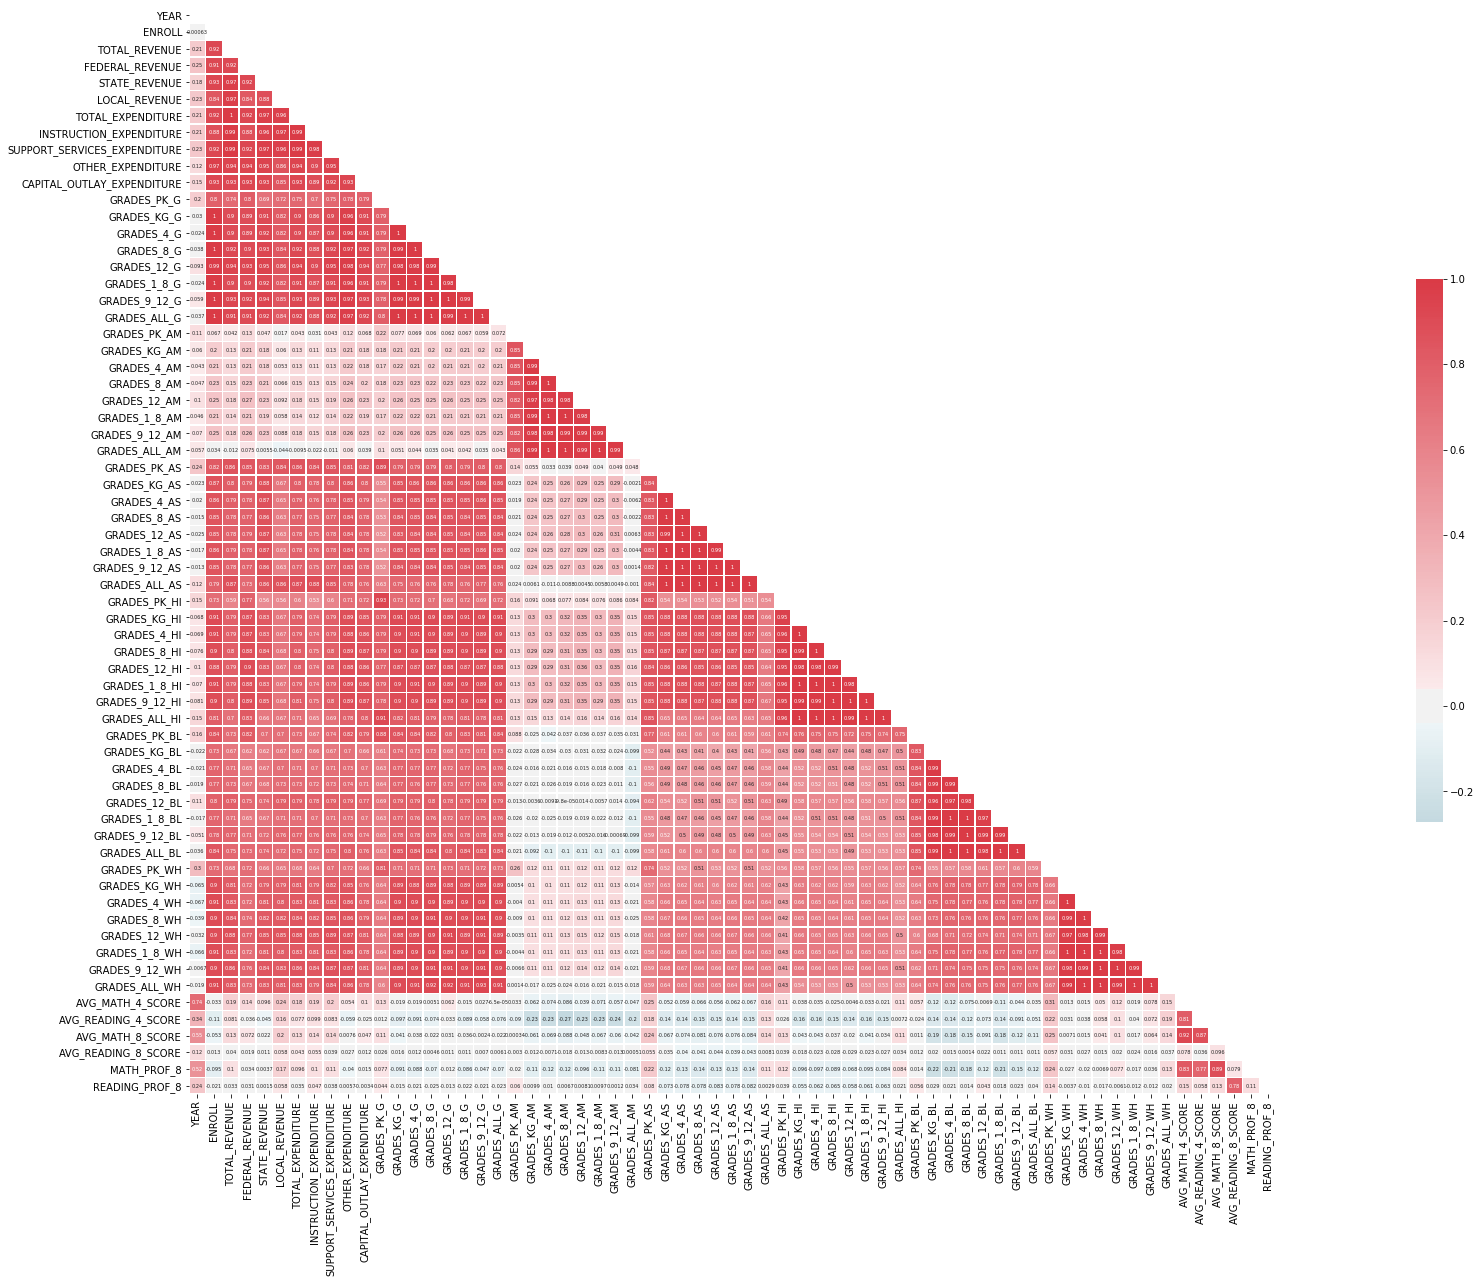

In [68]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, annot_kws={"size": 5},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# ***Fit a Model***

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [70]:
# Arrange data into X features matrix and y target vector

target = 'READING_PROF_8'
X_train = train.drop(columns=[target,'AVG_READING_8_SCORE'])
y_train = train[target]
X_val = val.drop(columns=[target,'AVG_READING_8_SCORE'])
y_val = val[target]
X_test = test.drop(columns=[target,'AVG_READING_8_SCORE'])
y_test = test[target]

## ***Random Forest***

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
# Random forest model

rf1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                           random_state=42)
)

#Fit on train, score on val
rf1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['STATE'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'STATE',
                                          'data_type': dtype('O'),
                                          'mapping': WISCONSIN                1
NEW_JERSEY               2
RHODE_ISLAND             3
OHIO                     4
NEVADA                   5
OKLAHOMA                 6
CALIFORNIA               7
DISTRICT_OF_COLUMBIA     8
KANSAS                   9
CONNECTICUT             10
GEORGIA                 11
NEBRASKA                12
NORTH_DAKOTA            13
OREGON                  14
UT...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
      

In [73]:
# Val accuracy
print('Train Accuracy', rf1.score(X_train, y_train))
print('Validation Accuracy', rf1.score(X_val, y_val))

Train Accuracy 1.0
Validation Accuracy 0.4853801169590643


In [74]:
rf1.named_steps

{'ordinalencoder': OrdinalEncoder(cols=['STATE'], drop_invariant=False, handle_missing='value',
                handle_unknown='value',
                mapping=[{'col': 'STATE', 'data_type': dtype('O'),
                          'mapping': WISCONSIN                1
 NEW_JERSEY               2
 RHODE_ISLAND             3
 OHIO                     4
 NEVADA                   5
 OKLAHOMA                 6
 CALIFORNIA               7
 DISTRICT_OF_COLUMBIA     8
 KANSAS                   9
 CONNECTICUT             10
 GEORGIA                 11
 NEBRASKA                12
 NORTH_DAKOTA            13
 OREGON                  14
 UTAH                    15
 WEST_VIRGINIA           16
 MISSISSIPPI             17
 SOUTH_CAROLINA...
 MONTANA                 21
 MARYLAND                22
 INDIANA                 23
 TEXAS                   24
 NEW_MEXICO              25
 ALASKA                  26
 IDAHO                   27
 NORTH_CAROLINA          28
 FLORIDA                 29
 ALABAMA      

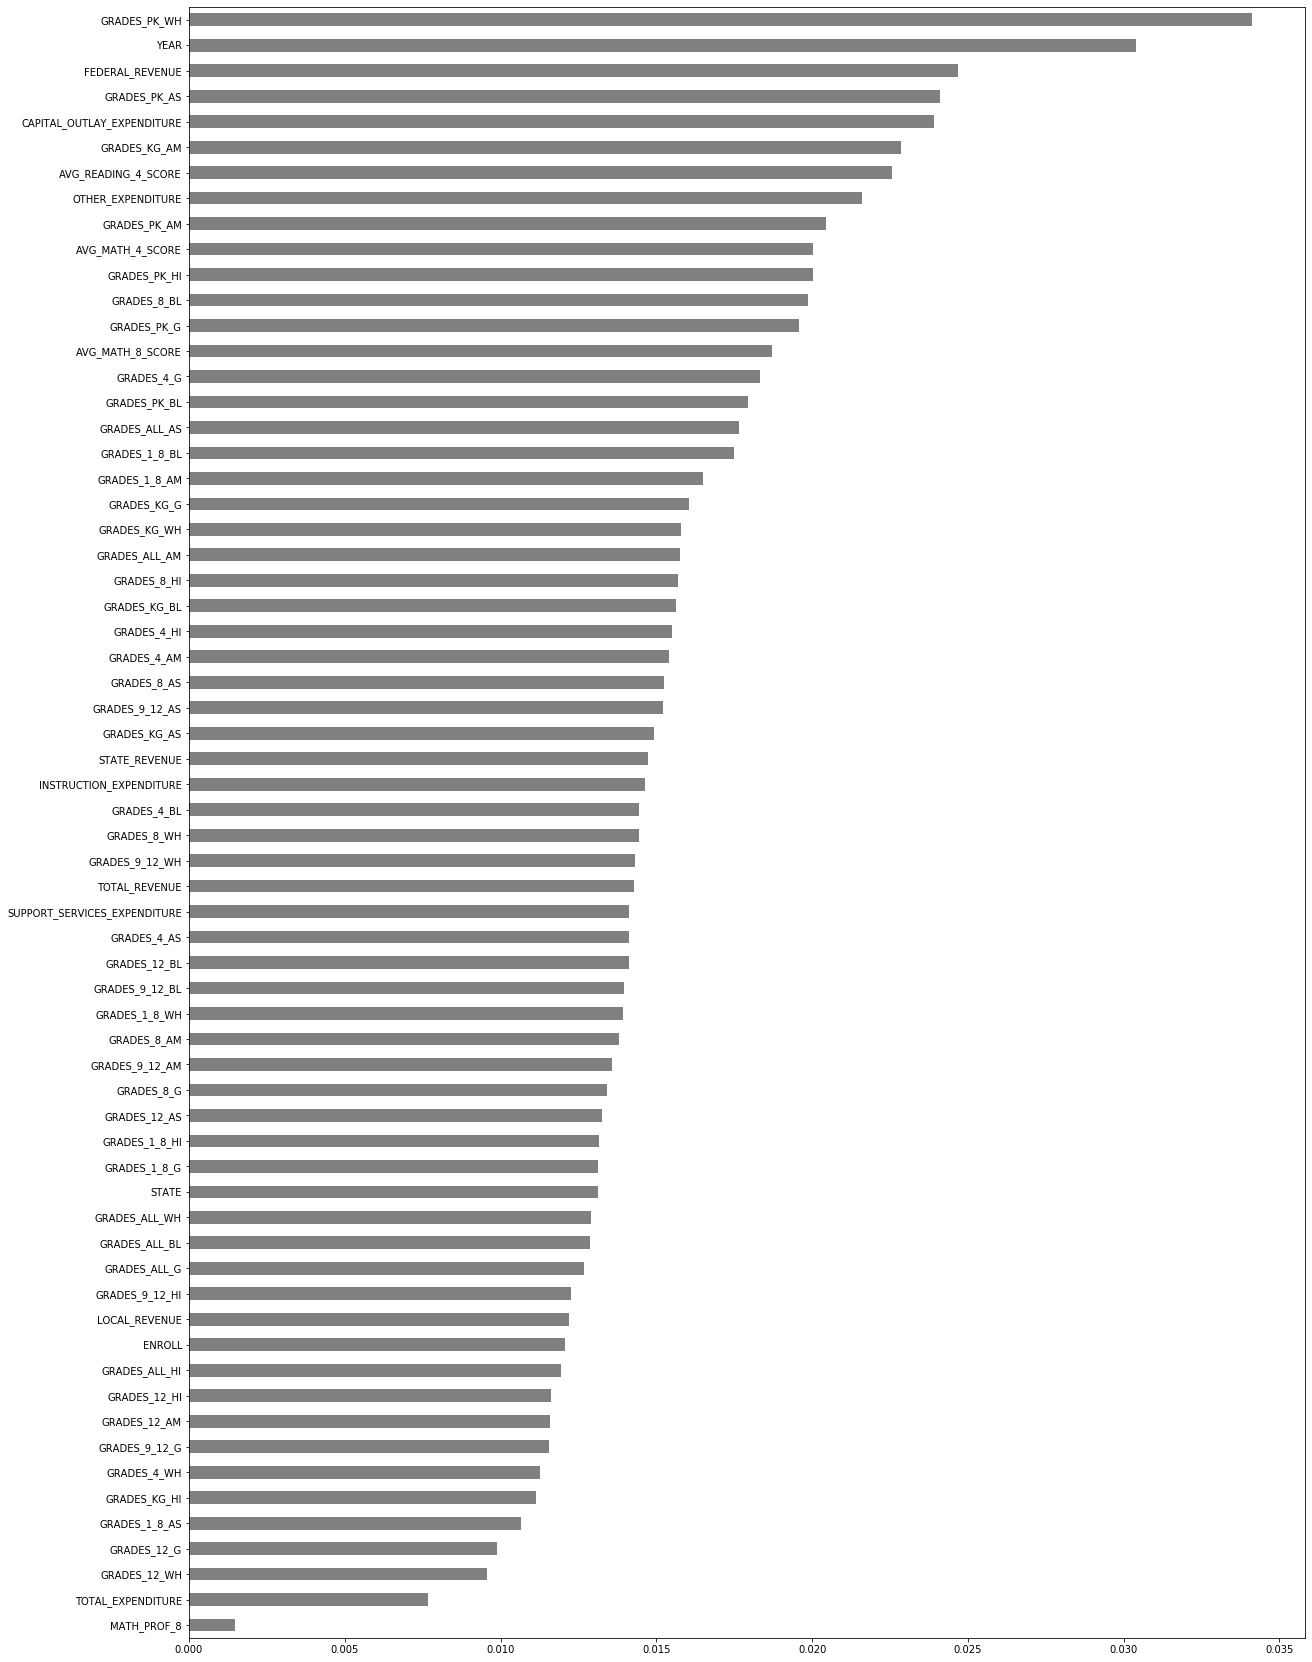

In [75]:
# Plot the feature importances
model = rf1.named_steps['randomforestclassifier']
encoder = rf1.named_steps['ordinalencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(20,30))
importances.sort_values().plot.barh(color='grey');

In [76]:
# Random forest model

rf2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=1000, criterion='entropy', 
                           max_depth=None, min_samples_split=5, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                           max_features=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, 
                           bootstrap=False, oob_score=False, n_jobs=-1, 
                           random_state=42, verbose=2, warm_start=True, 
                           class_weight='balanced')
)

#Fit on train, score on val
rf2.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:569: UserWarning:

class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 1000building tree 2 of 1000
building tree 3 of 1000

building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000building tree 13 of 1000

building tree 14 of 1000
building tree 15 of 1000building tree 16 of 1000

building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000building tree 31 of 1000

building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000building tree 39 of 1000

building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s


building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000building tree 61 of 1000

building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000building tree 65 of 1000

building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000building tree 79 of 1000

building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000building tree 83 of 1000

building tree 84 of 1000
building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000
building tree 89 of 1000
building tree 90 of 1000
building tree 91 of 1000
building tree 92 of 1000
building tree 93 of 1000
building tree 94 of 1000


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s


building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000building tree 197 of 1000

building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000building tree 208 of 1000

building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000building tree 212 of 1000

building tree 213 of 1000
building tree 214 of 1000building tree 215 of 1000

building tree 216 of 1000
building tree 217 of 1000building tree 218 of 1000

building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000building tree

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.9s


building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000building tree 379 of 1000
building tree 380 of 1000

building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000building tree 391 of 1000

building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000building tree 400 of 1000

building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000building tree 404 of 1000

building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tree 410 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    5.7s


building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tre

building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000building tree 981 of 1000

building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000building tree 988 of 1000

building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000building tree 996 of 1000

building tree 997 of 1000building tree 998 of 1000

building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.8s finished


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['STATE'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'STATE',
                                          'data_type': dtype('O'),
                                          'mapping': WISCONSIN                1
NEW_JERSEY               2
RHODE_ISLAND             3
OHIO                     4
NEVADA                   5
OKLAHOMA                 6
CALIFORNIA               7
DISTRICT_OF_COLUMBIA     8
KANSAS                   9
CONNECTICUT             10
GEORGIA                 11
NEBRASKA                12
NORTH_DAKOTA            13
OREGON                  14
UT...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=None,
                 

In [77]:
# Val accuracy
print('Train Accuracy', rf2.score(X_train, y_train))
print('Validation Accuracy', rf2.score(X_val, y_val))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s


Train Accuracy 0.9840637450199203


[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s


Validation Accuracy 0.5380116959064327


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [78]:
rf2.named_steps

{'ordinalencoder': OrdinalEncoder(cols=['STATE'], drop_invariant=False, handle_missing='value',
                handle_unknown='value',
                mapping=[{'col': 'STATE', 'data_type': dtype('O'),
                          'mapping': WISCONSIN                1
 NEW_JERSEY               2
 RHODE_ISLAND             3
 OHIO                     4
 NEVADA                   5
 OKLAHOMA                 6
 CALIFORNIA               7
 DISTRICT_OF_COLUMBIA     8
 KANSAS                   9
 CONNECTICUT             10
 GEORGIA                 11
 NEBRASKA                12
 NORTH_DAKOTA            13
 OREGON                  14
 UTAH                    15
 WEST_VIRGINIA           16
 MISSISSIPPI             17
 SOUTH_CAROLINA...
 MONTANA                 21
 MARYLAND                22
 INDIANA                 23
 TEXAS                   24
 NEW_MEXICO              25
 ALASKA                  26
 IDAHO                   27
 NORTH_CAROLINA          28
 FLORIDA                 29
 ALABAMA      

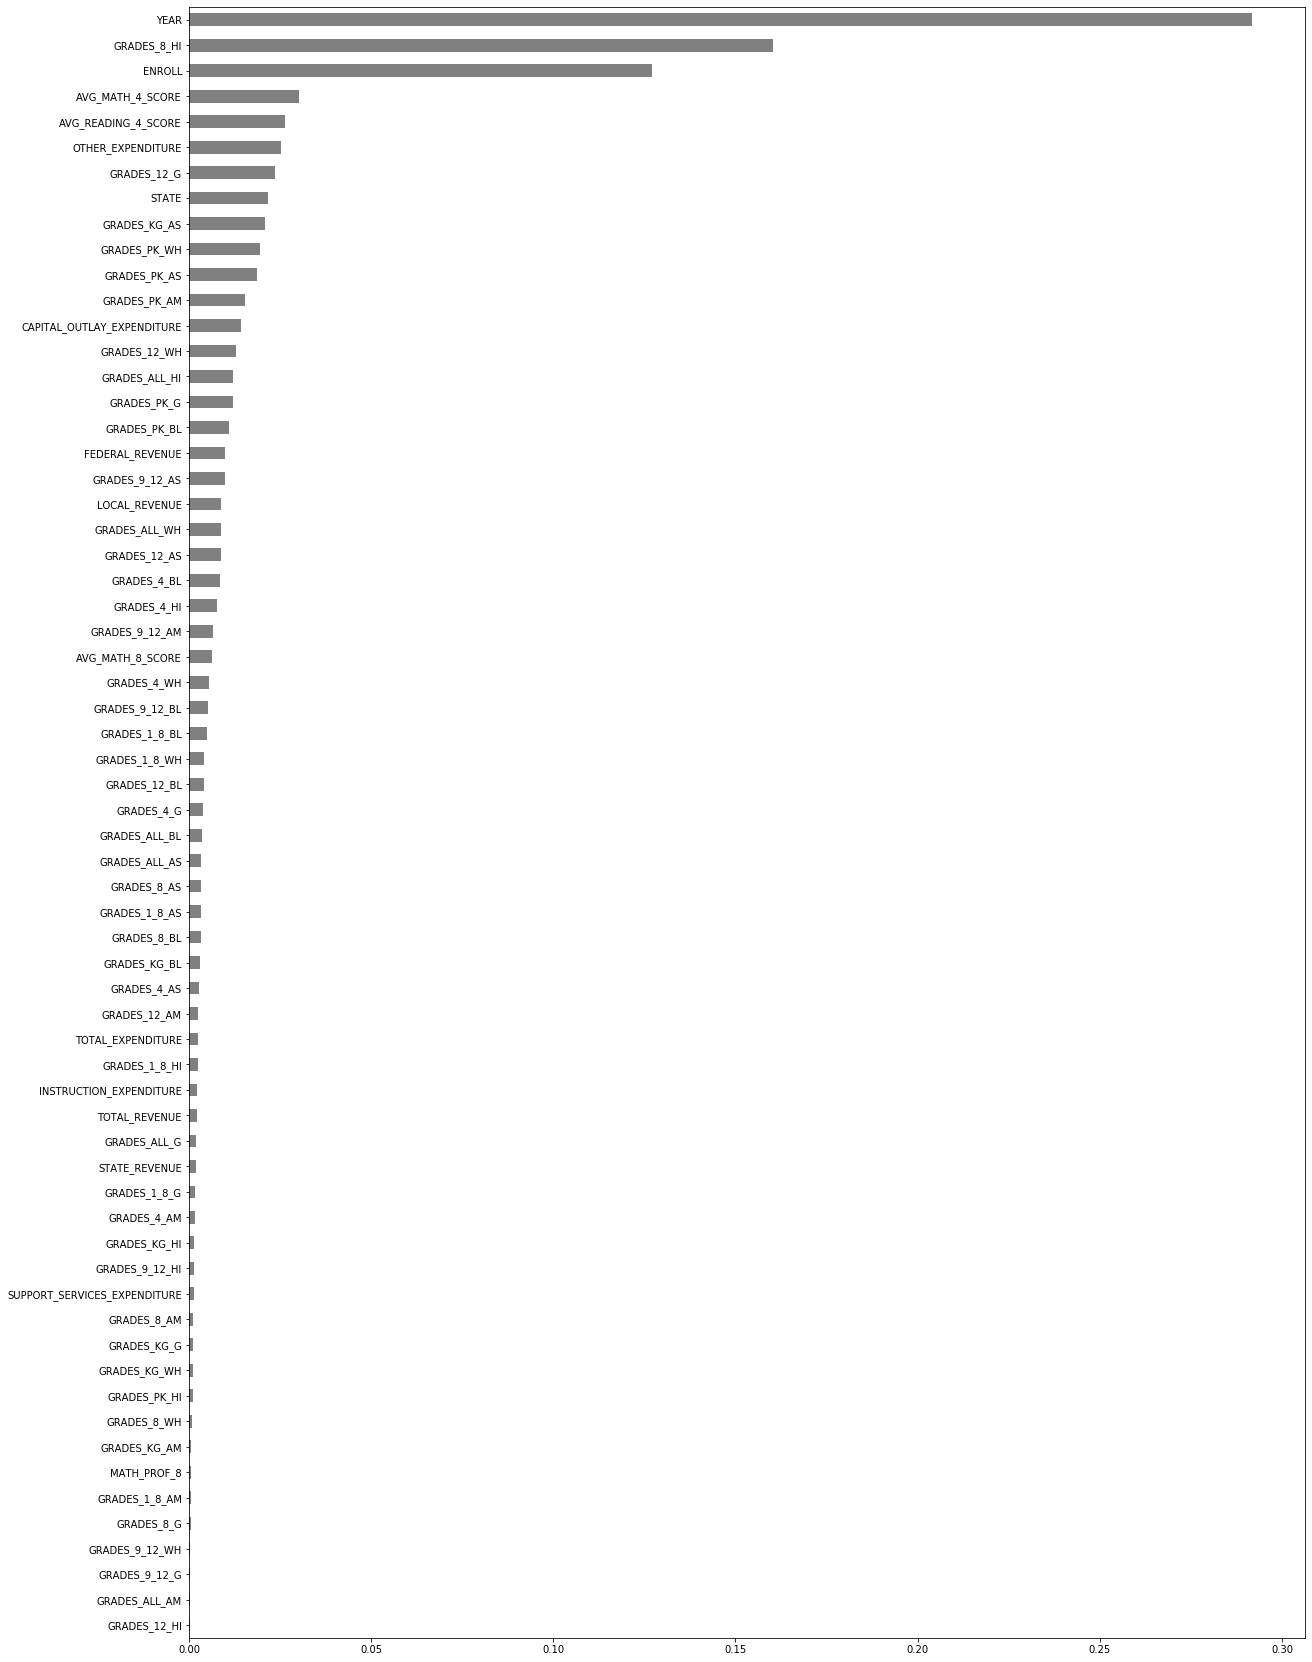

In [79]:
# Plot the feature importances
model = rf2.named_steps['randomforestclassifier']
encoder = rf2.named_steps['ordinalencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(20,30))
importances.sort_values().plot.barh(color='grey');

In [80]:
print('---------------Random Forest---------------')
print(f'Validation Accuracy Random Forest Model 1 {rf1.score(X_val, y_val)}')
print(f'Validation Accuracy Random Forest Model 2 {rf2.score(X_val, y_val)}')
print(f'Difference between model 1 and 2: {(rf2.score(X_val, y_val)) -(rf1.score(X_val, y_val)) }')


---------------Random Forest---------------
Validation Accuracy Random Forest Model 1 0.4853801169590643


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s


Validation Accuracy Random Forest Model 2 0.5380116959064327


[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Difference between model 1 and 2: 0.05263157894736842


My second model is a better model than the first. This beats my baseline by about 4%. 

## ***XGBOOST***

Hyperparemeter Tuning

https://towardsdatascience.com/doing-xgboost-hyper-parameter-tuning-the-smart-way-part-1-of-2-f6d255a45dde

In [81]:
from xgboost import XGBClassifier

In [82]:
xg1 = make_pipeline(
    ce.OrdinalEncoder(),   
    XGBClassifier(max_depth=10, eta=0.1, 
                  n_estimators=1000, 
                  n_jobs=-1, min_child_weight=1, 
                  subsample=0.9, colsample_bytree=0.9, 
                  objective='multi:softmax', 
                  eval_metric='merror', gamma=0, 
                  scale_pos_weight=1, 
                  seed=42)
)

# Fit on train
xg1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['STATE'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'STATE',
                                          'data_type': dtype('O'),
                                          'mapping': WISCONSIN                1
NEW_JERSEY               2
RHODE_ISLAND             3
OHIO                     4
NEVADA                   5
OKLAHOMA                 6
CALIFORNIA               7
DISTRICT_OF_COLUMBIA     8
KANSAS                   9
CONNECTICUT             10
GEORGIA                 11
NEBRASKA                12
NORTH_DAKOTA            13
OREGON                  14
UT...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bytree=0.9,
                               eta=0.1, eval_metric='merror', gamma=0,
                     

In [83]:
# Score on val
print('Train Accuracy:', xg1.score(X_train, y_train))
print('Validation Accuracy:', xg1.score(X_val, y_val))

Train Accuracy: 1.0
Validation Accuracy: 0.49122807017543857


In [84]:
xg2 = make_pipeline(
    ce.OrdinalEncoder(),   
    XGBClassifier(learning_rate = 0.15,
                  n_estimators=1000,
                  max_depth=15, eta=0.1, 
                  min_child_weight=7,  
                  n_jobs=-1, gamma=0.4,
                  subsample=0.7, colsample_bytree=0.8, 
                  objective='multi:softmax', 
                  eval_metric='merror',  
                  scale_pos_weight=1, 
                  seed=27)
                  )


# Fit on train
xg2.fit(X_train, y_train)

# {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

# Xgboost
# scale_pos_weight (for imbalanced classes)
# max_depth (usually low, can try increasing)
# n_estimators (too low underfits, too high wastes time/overfits) — Use Early Stopping!
# learning_rate (too low underfits, too high overfits)
#https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html
# https://xgboost.readthedocs.io/en/latest/tutorials/dart.html

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['STATE'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'STATE',
                                          'data_type': dtype('O'),
                                          'mapping': WISCONSIN                1
NEW_JERSEY               2
RHODE_ISLAND             3
OHIO                     4
NEVADA                   5
OKLAHOMA                 6
CALIFORNIA               7
DISTRICT_OF_COLUMBIA     8
KANSAS                   9
CONNECTICUT             10
GEORGIA                 11
NEBRASKA                12
NORTH_DAKOTA            13
OREGON                  14
UT...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bytree=0.8,
                               eta=0.1, eval_metric='merror', gamma=0.4,
                   

In [85]:
# Score on val
print('Train Accuracy:', xg2.score(X_train, y_train))
print('Validation Accuracy:', xg2.score(X_val, y_val))

Train Accuracy: 0.9960159362549801
Validation Accuracy: 0.4853801169590643


In [86]:
print('---------------Random Forest---------------')
print(f'Validation Accuracy Random Forest Model 1 {xg1.score(X_val, y_val)}')
print(f'Validation Accuracy Random Forest Model 2 {xg2.score(X_val, y_val)}')
print(f'Difference between model 1 and 2: {(xg2.score(X_val, y_val)) -(xg1.score(X_val, y_val)) }')


---------------Random Forest---------------
Validation Accuracy Random Forest Model 1 0.49122807017543857
Validation Accuracy Random Forest Model 2 0.4853801169590643
Difference between model 1 and 2: -0.005847953216374269


Both models perform worse than my baseline.

# ***Visualize Features***

## ***Valdiation Metrics***

In [87]:
processor = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'median')
)

In [88]:
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)
X_test_processed = processor.transform(X_test)

In [89]:
model_rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', 
                                  max_depth=None, min_samples_split=5, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None, 
                                  bootstrap=False, oob_score=False, n_jobs=-1, 
                                  random_state=42, verbose=2, warm_start=True, 
                                  class_weight='balanced')

In [90]:
model_rf.fit(X_train_processed, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:569: UserWarning:

class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000building tree 3 of 1000
building tree 4 of 1000

building tree 5 of 1000building tree 6 of 1000

building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000building tree 10 of 1000
building tree 11 of 1000

building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000building tree 15 of 1000building tree 16 of 1000


building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000building tree 24 of 1000

building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000building tree 28 of 1000

building tree 29 of 1000
building tree 30 of 1000building tree 31 of 1000

building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000building tree 35 of 1000

building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s


building tree 51 of 1000
building tree 52 of 1000building tree 53 of 1000

building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000building tree 63 of 1000building tree 64 of 1000


building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000building tree 73 of 1000

building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000
building tree 83 of 1000
building tree 84 of 1000
building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000
building tree 89 of 1000
building tree 90 of 1000


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000building tree 182 of 1000

building tree 183 of 1000
building tree 184 of 1000building tree 185 of 1000

building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000building tree 189 of 1000

building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000building tree 194 of 1000

building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000building tree 203 of 1000
building tree 204 of 1000

building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000
building tree 212 of 1000
building tree 213 of 1000
building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.1s


building tree 368 of 1000building tree 369 of 1000
building tree 370 of 1000

building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000building tree 378 of 1000

building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000building tree 384 of 1000

building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000building tree 389 of 1000

building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    5.2s


building tree 647 of 1000building tree 648 of 1000

building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000building tree 652 of 1000

building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000building tree 672 of 1000

building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tre

building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000building tree 985 of 1000

building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000building tree 990 of 1000

building tree 991 of 1000building tree 992 of 1000

building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000building tree 997 of 1000

building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.1s finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=2,
                       warm_start=True)

In [91]:
model_rf.score(X_val_processed, y_val)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


0.5029239766081871

### ***Confusion Matrix***

A **confusion matrix** is a table that is used to evaluate the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [92]:
conda install -c conda-forge/label/cf201901 scikit-plot

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
y_pred = model_rf.predict(X_val_processed)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [95]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[ 0  0  2]
 [ 1 43 48]
 [ 0 34 43]]


### ***Permutation Importances***

In [96]:
!pip install eli5

In [97]:
import eli5

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



In [98]:
from eli5.sklearn import PermutationImportance

In [99]:
permuter = PermutationImportance(
    model_rf,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_processed, y_val)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    

[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent work

[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jo

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent work

[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent work

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Don

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent work

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Don

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=5,
                                                       min_w

In [100]:
permuter.feature_importances_

array([-9.35672515e-03, -7.01754386e-03,  0.00000000e+00, -3.50877193e-03,
       -1.16959064e-03, -2.33918129e-03,  4.67836257e-03, -2.33918129e-03,
        1.16959064e-03, -1.16959064e-03,  0.00000000e+00, -2.22044605e-17,
        2.10526316e-02, -4.67836257e-03,  4.67836257e-03,  0.00000000e+00,
        1.16959064e-03, -2.33918129e-03,  0.00000000e+00, -2.33918129e-03,
        1.16959064e-03,  4.67836257e-03,  2.33918129e-03,  0.00000000e+00,
       -3.50877193e-03,  0.00000000e+00,  1.16959064e-03,  0.00000000e+00,
       -1.28654971e-02,  2.33918129e-03, -1.16959064e-03,  2.33918129e-03,
       -1.87134503e-02,  2.33918129e-03,  5.84795322e-03, -4.67836257e-03,
       -4.67836257e-03,  0.00000000e+00, -1.11022302e-17, -4.67836257e-03,
       -1.05263158e-02,  0.00000000e+00,  0.00000000e+00,  2.33918129e-02,
        7.01754386e-03, -7.01754386e-03, -1.52046784e-02, -1.75438596e-02,
       -9.35672515e-03, -5.84795322e-03, -1.16959064e-02, -8.18713450e-03,
       -1.40350877e-02,  

In [101]:
eli5.show_weights(
    permuter,
    top = None,
    feature_names = X_val.columns.to_list()
)

Weight,Feature
0.0234 ± 0.0296,GRADES_ALL_HI
0.0211 ± 0.0310,GRADES_PK_G
0.0082 ± 0.0159,GRADES_12_WH
0.0070 ± 0.0250,GRADES_PK_BL
0.0058 ± 0.0128,GRADES_9_12_AS
0.0058 ± 0.0412,AVG_READING_4_SCORE
0.0047 ± 0.0047,GRADES_KG_AM
0.0047 ± 0.0187,LOCAL_REVENUE
0.0047 ± 0.0047,GRADES_8_WH
0.0047 ± 0.0047,GRADES_4_G


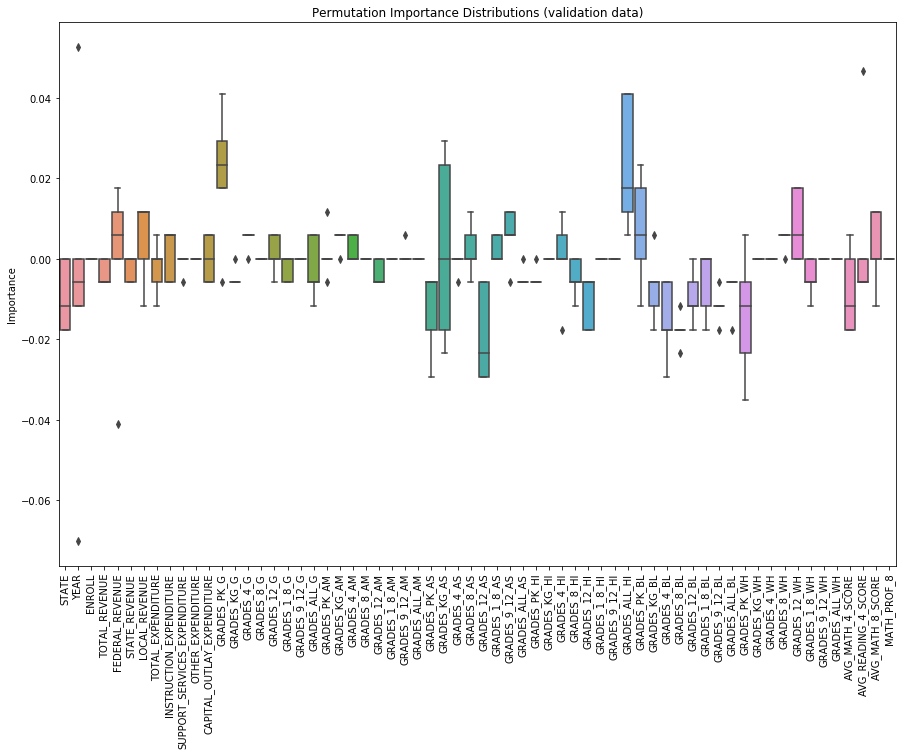

In [102]:
permuter_df = pd.DataFrame(data = permuter.results_, 
                          columns = X_val.columns.to_list())
fig, ax = plt.subplots(figsize =(15, 10))
ax = sns.boxplot(data=permuter_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set(title='Permutation Importance Distributions (validation data)',ylabel='Importance');

In [103]:
print('Shape before removing features', X_train.shape)

Shape before removing features (251, 64)


In [104]:
minimum_importance = 0 
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [105]:
print('Shape after removing features:', X_train.shape)

Shape after removing features: (251, 19)


In [106]:
X_val_permuted = X_val[features]

pipeline_rf = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=1000, criterion='entropy', 
                           max_depth=None, min_samples_split=5, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                           max_features=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, 
                           bootstrap=False, oob_score=False, n_jobs=-1, 
                           random_state=42, verbose=2, warm_start=True, 
                           class_weight='balanced')
)

# Fit on train, score on val
pipeline_rf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:569: UserWarning:

class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s


building tree 1 of 1000building tree 2 of 1000
building tree 3 of 1000

building tree 4 of 1000
building tree 5 of 1000building tree 6 of 1000

building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000building tree 10 of 1000

building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000building tree 14 of 1000

building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000building tree 22 of 1000

building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000building tree 28 of 1000

building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000building tree 32 of 1000

building tree 33 of 1000building tree 34 of 1000building tree 35 of 1000


building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000building tree 39 of 1000

building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.5s


building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000building tree 218 of 1000

building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000building tree 226 of 1000

building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000building tree 231 of 1000

building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tree 250 of 1000
building tree 251 of 1000
building tree 252 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.0s


building tree 430 of 1000building tree 431 of 1000

building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000building tree 437 of 1000

building tree 438 of 1000building tree 439 of 1000

building tree 440 of 1000building tree 441 of 1000

building tree 442 of 1000
building tree 443 of 1000building tree 444 of 1000building tree 445 of 1000


building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000
building tree 452 of 1000
building tree 453 of 1000building tree 454 of 1000

building tree 455 of 1000building tree 456 of 1000

building tree 457 of 1000
building tree 458 of 1000
building tree 459 of 1000building tree 460 of 1000

building tree 461 of 1000
building tree 462 of 1000
building tree 463 of 1000
building tree 464 of 1000
building tree 465 of 1000
building tree 466 of 1000
building tree 467 of 1000building tree

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    1.9s


building tree 707 of 1000
building tree 708 of 1000
building tree 709 of 1000
building tree 710 of 1000
building tree 711 of 1000
building tree 712 of 1000
building tree 713 of 1000
building tree 714 of 1000
building tree 715 of 1000
building tree 716 of 1000
building tree 717 of 1000building tree 718 of 1000

building tree 719 of 1000
building tree 720 of 1000
building tree 721 of 1000
building tree 722 of 1000
building tree 723 of 1000
building tree 724 of 1000
building tree 725 of 1000building tree 726 of 1000

building tree 727 of 1000building tree 728 of 1000

building tree 729 of 1000building tree 730 of 1000

building tree 731 of 1000
building tree 732 of 1000building tree 733 of 1000

building tree 734 of 1000
building tree 735 of 1000
building tree 736 of 1000
building tree 737 of 1000building tree 738 of 1000

building tree 739 of 1000
building tree 740 of 1000
building tree 741 of 1000building tree 742 of 1000

building tree 743 of 1000
building tree 744 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.9s finished


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(b..., ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impu

In [107]:
print('Validation Accuracy:', pipeline_rf.score(X_val_permuted, y_val))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s


Validation Accuracy: 0.49122807017543857


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


### ***Partial Dependence Plot***

In [108]:
!pip install pdpbox

In [109]:
plt.rcParams['figure.dpi'] = 72

#### ***PDP_Isolate***

In [110]:
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot

In [111]:
min(X_train['INSTRUCTION_EXPENDITURE']), max(X_train['INSTRUCTION_EXPENDITURE'])

(315009.0, 38756656.0)

In [112]:
feature = 'INSTRUCTION_EXPENDITURE'

isolated = pdp_isolate(
    model = rf1, 
    dataset = X_val, 
    model_features = X_val.columns, 
    feature = feature,
    num_grid_points = 50
)

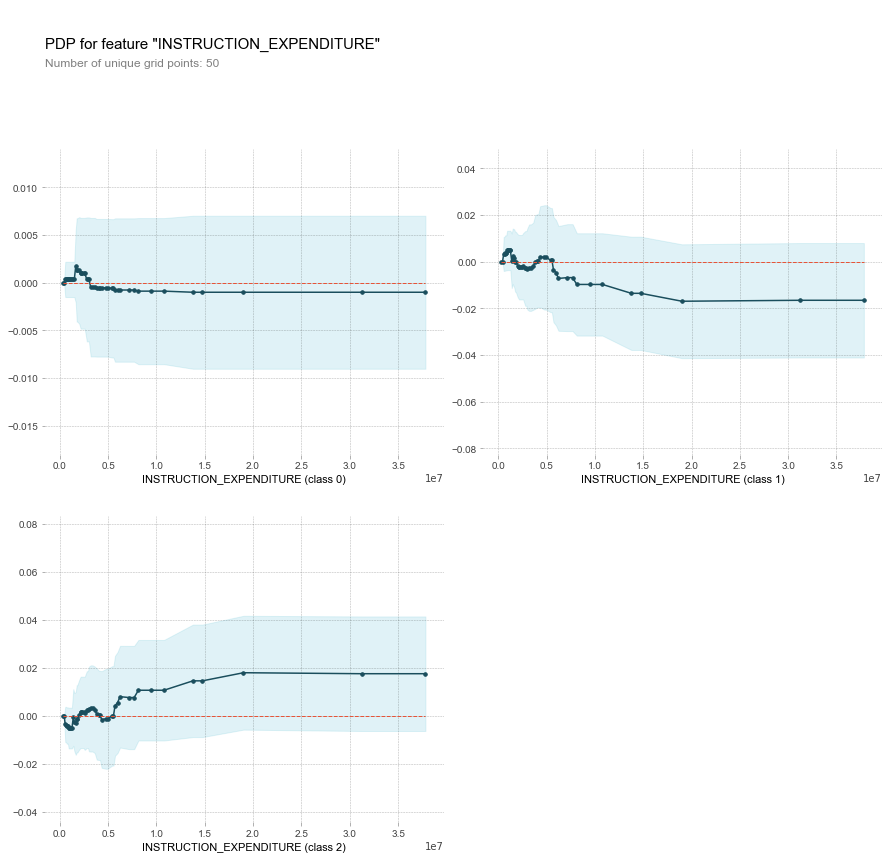

In [113]:
pdp_plot(isolated, feature_name = feature);

(0, 10)

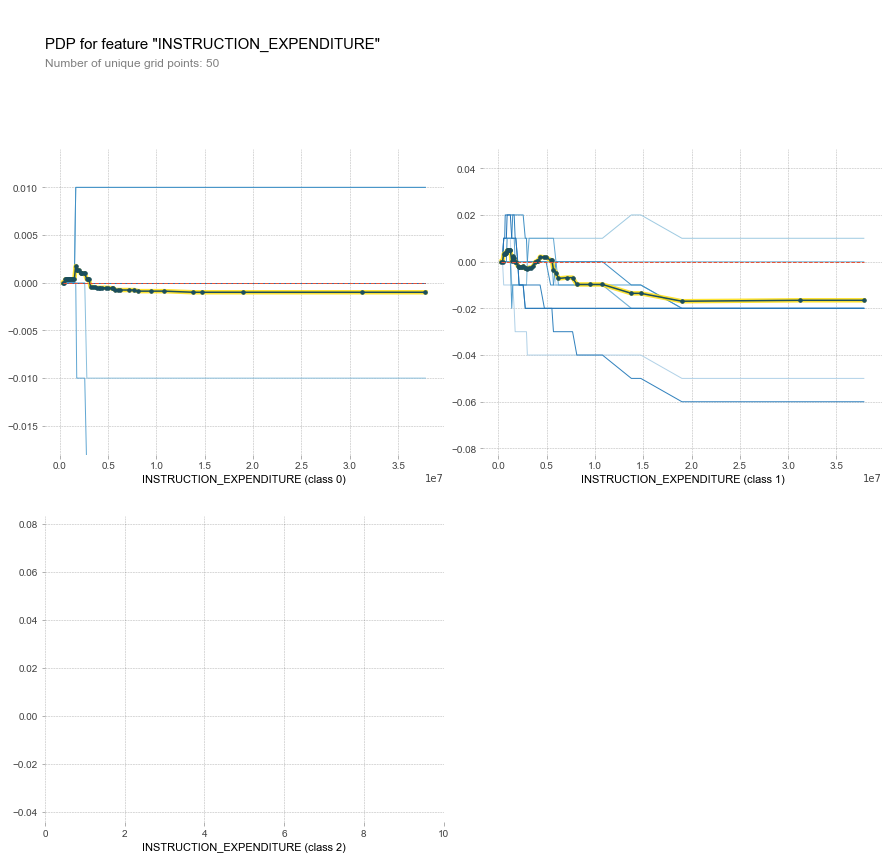

In [114]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=10)
plt.xlim(0, 10)

#### ***Feature Interaction***

In [115]:
!pip install PDPbox

In [116]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

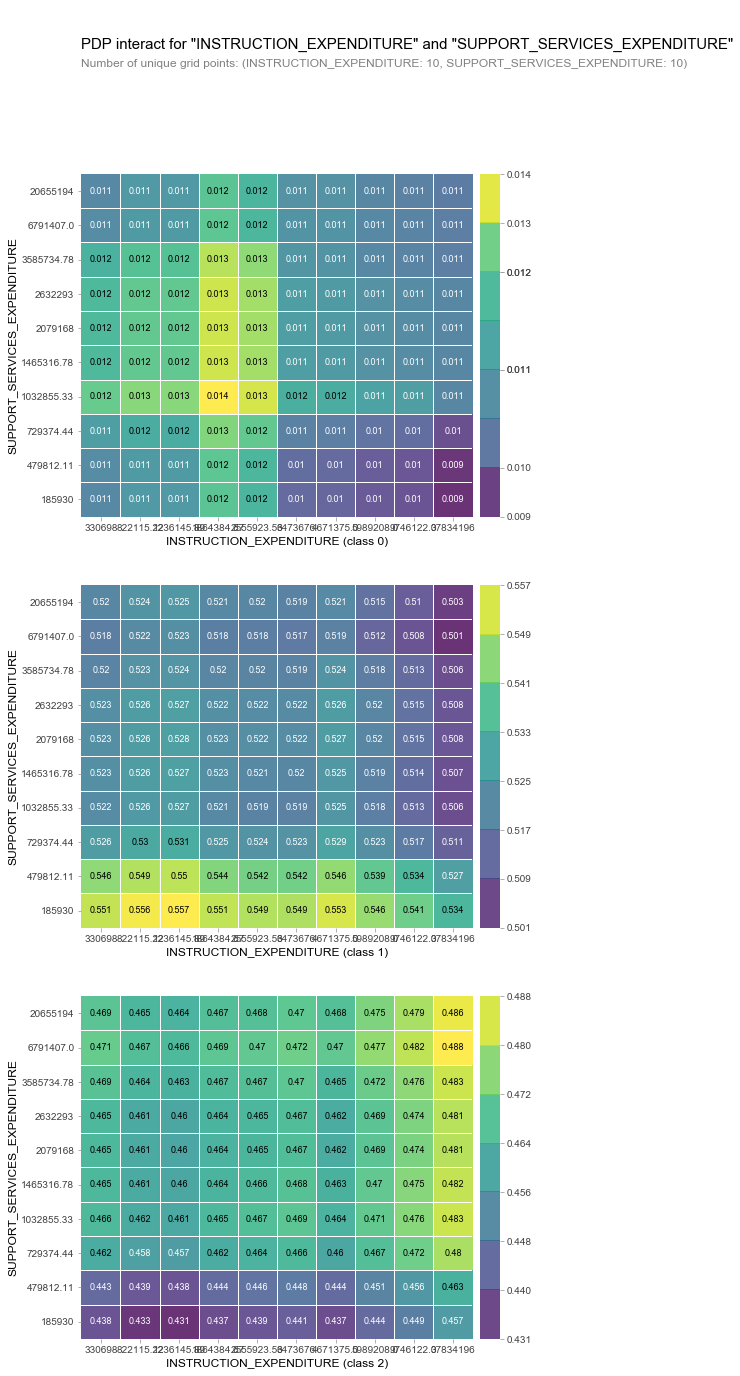

In [117]:
features=['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE']

interaction = pdp_interact(
    model = rf1,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)


pdp_interact_plot(interaction, 
                  features, 
                  plot_type='grid',
                  x_quantile=False,
                  ncols=1,
                  );

### Shapley Value

In [118]:
!pip install shap

In [119]:
import shap

In [120]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_test.iloc[[0]]
row

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_WH,GRADES_8_WH,GRADES_12_WH,GRADES_1_8_WH,GRADES_9_12_WH,GRADES_ALL_WH,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,MATH_PROF_8
1178,ALABAMA,2015,734974.0,7360222.0,795238.0,4080167.0,2484817.0,7501799.0,3817479.0,2414860.0,...,30813.0,31774.0,29542.0,250169.0,127083.0,383639.0,230.977423,217.04909,266.0,1.0


In [121]:
y_test.iloc[[0]]

1178    3.0
Name: READING_PROF_8, dtype: float64

In [122]:
explainer=shap.TreeExplainer(model, feature_perturbation='interventional')
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed, check_additivity=False, approximate=False)
shap_values

[array([[ 0.        , -0.18657386, -0.18657386,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.00187494,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.00198296,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.03595649,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[ 6.72874346e-03, -1.29160569e-01,  1.13078979e-01,
         -6.23249892e-04, -4.91352419e-03, -9.10752883e-05,
         -6.80522034e-02,  1.18319465e-03, -4.29741970e-04,
          2.76093677e-04, -6.88596805e-04, -9.49077549e-03,
         -1.59104266e-02,  9.04622491e-05,  1.48742428e-03,
          4.53455817e-04, -2.98252369e-04, -9.22150141e-05,
          3.76474934e-04, -2.41009801e-04, -6.37761561e-02,
          4.94588642e-04, -1.99734859e-03,  2.27352245e-04,
         -1.72382919e-03,  3.35796073e-04,  1.93356268e-02,
          2.74337078e-05,  7.17044638e-03, -1.81349490e-01,
         -8.98555522e-04, -2.29101230e-03,  2.64561829e-02,
         -2.33808618e-03,  2.80940602e-02, -2.66271604e-04,
          3.75847903e-04, -9.81969790e-05,  4.44235367e-03,
         -1.67450658e-02,  9.85732616e-05, -3.52310313e-04,
         -1.46190603e-04,  1.05726695e-02, -3.76132017e-03,
         -2.33612290e-04,  1.80320974e-03, -3.98156235e-04,
         -8.80624418e-04, -1.51357516e-03, -8.52400563e-04,
          1.39118152e-03, -3.75391651e-02,  1.08950971e-03,
          2.27244629e-03,  7.82316110e-04, -1.15413543e-03,
          1.95051490e-03,  6.76663913e-04,  5.57157929e-03,
         -4.65351024e-03, -2.06957808e-02,  3.37466082e-03,
          1.05259257e-04]]),
 array([[-6.72874346e-03,  3.15734430e-01,  7.34948813e-02,
          6.23249892e-04,  4.91352419e-03,  9.10752883e-05,
          6.80522034e-02, -1.18319465e-03,  4.29741970e-04,
         -2.76093677e-04, -1.18634039e-03,  9.49077549e-03,
          1.59104266e-02, -9.04622491e-05, -1.48742428e-03,
         -4.53455817e-04, -1.68470590e-03,  9.22150141e-05,
         -3.76474934e-04,  2.41009801e-04,  6.37761561e-02,
         -4.94588642e-04,  1.99734859e-03, -2.27352245e-04,
          1.72382919e-03, -3.35796073e-04, -1.93356268e-02,
         -2.74337078e-05, -7.17044638e-03,  1.81349490e-01,
          8.98555522e-04,  2.29101230e-03, -2.64561829e-02,
          2.33808618e-03, -2.80940602e-02,  2.66271604e-04,
         -3.75847903e-04,  9.81969790e-05, -4.44235367e-03,
         -1.92114261e-02, -9.85732616e-05,  3.52310313e-04,
          1.46190603e-04, -1.05726695e-02,  3.76132017e-03,
          2.33612290e-04, -1.80320974e-03,  3.98156235e-04,
          8.80624418e-04,  1.51357516e-03,  8.52400563e-04,
         -1.39118152e-03,  3.75391651e-02, -1.08950971e-03,
         -2.27244629e-03, -7.82316110e-04,  1.15413543e-03,
         -1.95051490e-03, -6.76663913e-04, -5.57157929e-03,
          4.65351024e-03,  2.06957808e-02, -3.37466082e-03,
         -1.05259257e-04]])]

In [123]:
explainer=shap.TreeExplainer(model, feature_perturbation='interventional')
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed, check_additivity=False, approximate=False)

shap.initjs()

shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=row,
    link='logit'               # For classification, this returns predicted probs
)

In [124]:
#Explanations for the whole X_val dataset


explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_val_processed, check_additivity=False)

shap.initjs()

shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=X_val_processed,
    feature_names = features
)


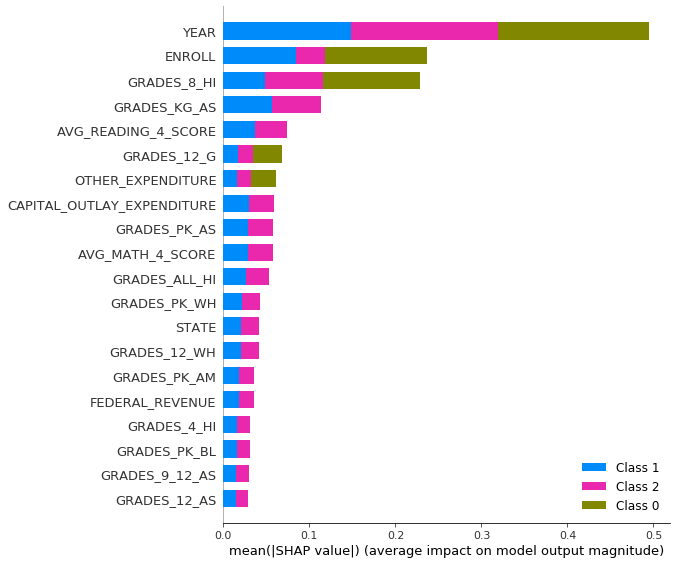

In [125]:
shap.summary_plot(shap_values, X_val, auto_size_plot=False)